In [205]:
#from google.colab import drive
#drive.mount('/content/drive')

In [206]:
import numpy as np
import random
#import scipy.ndimage as ndim
import imageio as io
import matplotlib.pyplot as plt

In [207]:
##path for the image in my computer
#path = './images/maison.tif'
##loading a 32x32 pixels image
#im_orig = io.imread(path)
#plt.title('Original Image')
#plt.imshow(im_orig, cmap='gray')

(2, 2)

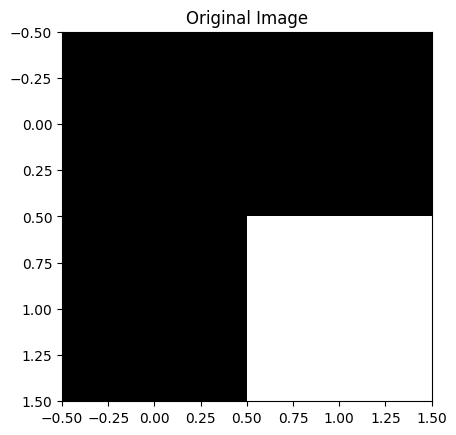

In [208]:
# Creating an image
u = 64*np.ones((2,2))
u[1,1] = 255
plt.imshow(u, cmap='gray')
plt.title('Original Image')
u.shape

In [209]:
im_orig = u

## DEFINING FUNCTIONS

### grain centers

In [210]:
def creat_grain_centers(im, r, e=0.01):
  ''']
    Return a list of grains centers position in image
    The list dimention can be interpreted as: (pixel, grain in the pixel, grain_center_position (x,y))
  '''
  #image dimensions
  dimx = im.shape[0]
  dimy = im.shape[1]

  #list for save centers
  grain_center_list = []

  #initializing normalized image
  im_norm = np.zeros(im.shape)

  #initializing array of lambdas  
  lbd = np.zeros(im.shape)
  
  #for each image pixel
  for i in range(dimx):
    for j in range(dimy):

      #image normalization
      im_norm[i,j] = im[i,j]/(255 + e)

      #piecewise constant lambda of Poisson Distribution for 
      lbd[i,j] = 1/(np.pi*r**2) * np.log10(1/(1-im_norm[i,j])) 

      Q = np.random.poisson(lbd[i,j]) #Quantity of grain for each pixel 
      x = [] #initializing list of grain centers

      for _ in range(Q): 
        c_x = np.random.uniform(i, i+1) #random uniform distribution of position x 
        c_y = np.random.uniform(j, j+1) #random uniform distribution of position y
        x.append((c_x,c_y)) #adding a tuple of sorted grain center 
      grain_center_list.append(x) #adding the list of grains centers to the final list
  
  return grain_center_list

### grain image

In [211]:
#grain_image 
def grain_image(img_size, grain_centers, r, zoom=1):
  '''
    return the grained image
  '''

  new_sizex = zoom*img_size[0]
  new_sizey = zoom*img_size[1]

  grain_centers = grain_centers*zoom

  #inicializing grains img
  y = np.zeros((new_sizex,new_sizey)) 
  count = 0
  #for each pixel on image
  for i in range(new_sizex): 
    for j in range(new_sizey):
      for center in grain_centers:
        #if the pixel is in the circle, turn it white
        dist = (center - np.array((i+0.5,j+0.5)))**2
        dist = np.sum(dist)
        if dist < (r*zoom)**2:
          y[i,j] = 255
          break
      
      
  return y

## Final image

In [215]:
#defining radius
r = 0.1 #r = 0.2
#obtaining centers list
grain_center_list = creat_grain_centers(im_orig, r, e=0.1)

#transforming centers list into a matrix
grain_center_array = grain_center_list[0] #x_grains get the origin pixel grains (0,0)
qt_of_pixels = len(grain_center_list)  #quantity of pixels

for p in range(1, qt_of_pixels): #for each pixel 
  if (grain_center_list[p]): #if there are grains in pixel
    grain_center_array = np.concatenate((grain_center_array, grain_center_list[p]), axis=0)

#results: a matrix with each grain center position joined along rows
grain_center_array.shape

(95, 2)

(200, 200)

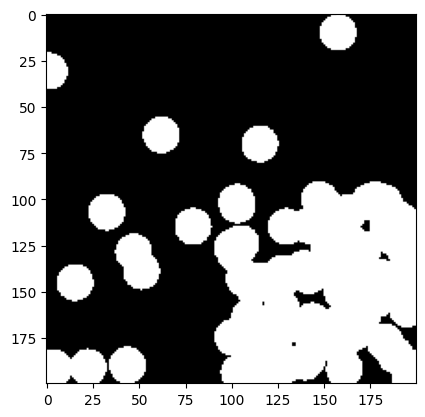

In [216]:
#creating the granulate image
im_gran = grain_image(im_orig.shape, grain_center_array, r, zoom=100)
plt.imshow(im_gran, cmap='gray')
im_gran.shape

In [214]:
# parametro zoom -> a imagem de saída será zoom*